In [34]:
import os
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
os.environ["KERAS_BACKEND"] = "tensorflow"

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
import tensorboard


# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_0_pocos_nulos.csv")

In [20]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,target,anyo,mes,dia,hora,dia_semanal
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15,2
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,Malicious C&C,2019,9,20,1,4
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0,5


TARGET

In [4]:
df.drop(columns={"uid"}, inplace=True)

In [5]:
df.rename(columns={"label":"target"}, inplace=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

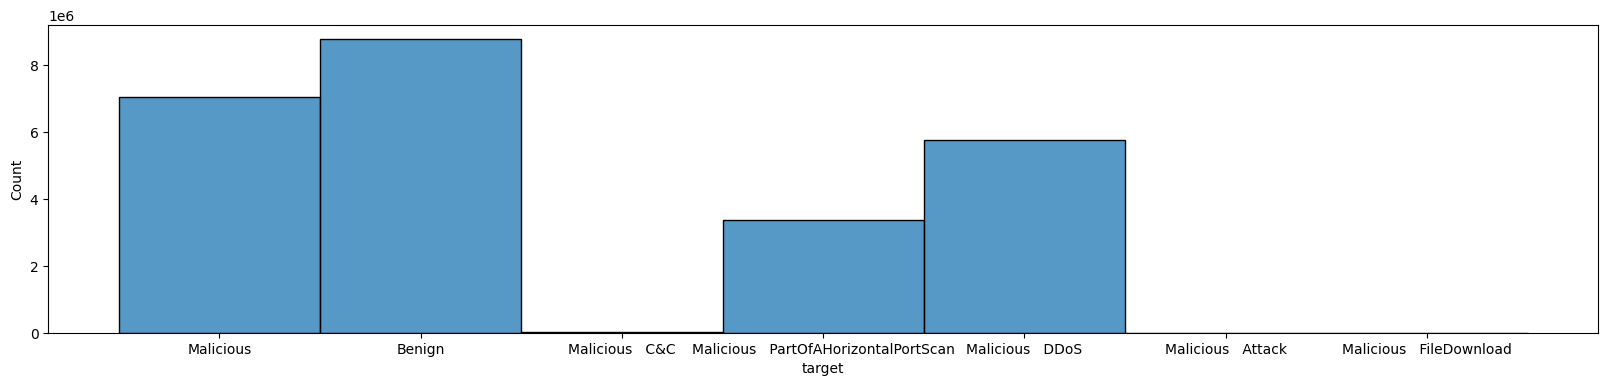

In [21]:
plt.figure(figsize=(20,4))
sns.histplot(df.target)

In [32]:
df.target.shape

(25011003,)

In [6]:
df.target.unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload'], dtype=object)

CONVERTUIMOS LOS VALORES MALICIOUS CON ALGUNA PALABRA EN MALICIOUS PARA QUEDARNOS CON UNA COLUMNA BINARIA

In [7]:
def reemplazar_malicioso(valor):
  if valor in ["Malicious   C&C", "Malicious   PartOfAHorizontalPortScan",
              "Malicious   DDoS", "Malicious   Attack", "Malicious   FileDownload"]:
    return "Malicious"
  else:
    return valor
  

In [8]:
df["Target"] = df["target"].apply(reemplazar_malicioso)


In [9]:
df.Target.shape

(25011003,)

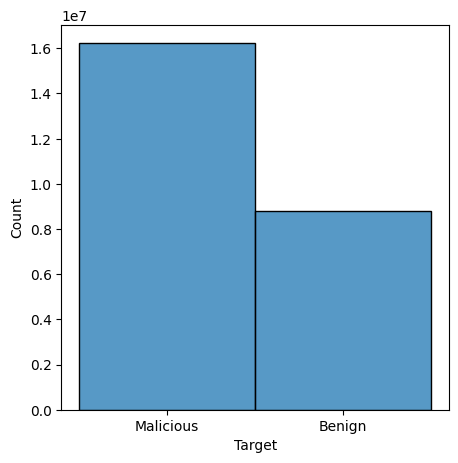

In [35]:
plt.figure(figsize=(5,5))
sns.histplot(df.Target, bins=100);

In [10]:
df.Target.value_counts()/len(df)*100

Malicious    64.894818
Benign       35.105182
Name: Target, dtype: float64

LA TARGET ESTA DESBALANCEADA

In [9]:
df.drop(columns={"target"}, inplace=True)


In [42]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_h,0.09,object,No,192.168.1.196,No,No,No,No,No,categorica ordinal,0.0
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
history,0.0,object,No,S,No,No,No,No,No,categorica ordinal,0.1
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0


In [10]:
df


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,Malicious
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign


TRANSFORMACION CATAEGORICAS Y NUMERICAS SALVO TARGET, YA Q LA VOY A BALANCEAR UN POCO CON SMOTE

In [11]:
col_cat=['id.orig_h',"id.resp_h","proto","conn_state","history"]
col_num=['orig_pkts', 'orig_ip_bytes',
       'resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora',
       'dia_semanal', "id.resp_p", "missed_bytes","id.orig_p"]
Target="Target"

In [12]:
#LABEL ENCONDER( a las categoricas)
lb = LabelEncoder()

for col in col_cat:
    df[col] = lb.fit_transform(df[col])

In [22]:
#NORMALIZACION L2.- para datops con diferentes magnitures en sus features
#normalizer = Normalizer(norm='l2')
#normalizer.fit(df.drop(["Target"], axis=1))


In [15]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,8939,51524.0,9752626,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
1,8939,56305.0,9664603,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
2,8939,41101.0,732384,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
3,8939,60905.0,1983916,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
4,8939,44301.0,11185695,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,8932,123.0,11036754,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25010999,8932,37306.0,165032,17769.0,1,7,0.0,168,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,Malicious
25011000,8932,123.0,7305270,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25011001,8932,123.0,9086491,123.0,2,10,0.0,14,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign


In [16]:
#MESTANDARIZACION (ya que l< distribucion no normal)
st=StandardScaler()

for col in df.drop(["Target"], axis=1):
    df[col] = st.fit_transform(df[col].values.reshape(-1,1))


In [109]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,0.011636,0.721750,1.349528,-0.436876,-0.122965,0.517746,-0.0002,0.343549,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371,Malicious
1,0.011636,1.018855,1.320794,-0.436876,-0.122965,0.517746,-0.0002,0.343549,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371,Malicious
2,0.011636,0.074036,-1.595060,-0.436876,-0.122965,0.517746,-0.0002,0.343549,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371,Malicious
3,0.011636,1.304711,-1.186507,-0.436876,-0.122965,0.517746,-0.0002,0.343549,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371,Malicious
4,0.011636,0.272893,1.817343,-0.436876,-0.122965,0.517746,-0.0002,0.343549,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,-0.023619,-2.472452,1.768722,-0.432367,7.245592,2.340543,-0.0002,-1.182130,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460,Benign
25010999,-0.023619,-0.161796,-1.780267,0.363413,-0.122965,0.973445,-0.0002,7.854585,0.510430,0.702246,2294.616334,1382.563821,1.607241,0.099767,-0.219342,-1.524071,0.174516,Malicious
25011000,-0.023619,-2.472452,0.550608,-0.432367,7.245592,2.340543,-0.0002,-1.182130,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460,Benign
25011001,-0.023619,-2.472452,1.132074,-0.432367,7.245592,2.340543,-0.0002,-1.182130,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460,Benign


In [17]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_h,0.09,float64,-0.0,No,1.0,1.0,-0.02,-0.02,0.02,numerica continua,0.0
id.orig_p,0.26,float64,-0.0,No,1.0,1.0,-0.43,0.19,0.77,numerica continua,0.0
id.resp_h,46.6,float64,-0.0,No,1.0,1.0,-0.78,-0.24,0.81,numerica continua,0.0
id.resp_p,0.26,float64,0.0,No,1.0,1.0,-0.44,-0.44,-0.43,numerica continua,0.0
proto,0.0,float64,0.0,No,1.0,1.0,-0.12,-0.12,-0.12,numerica discreta,0.0
conn_state,0.0,float64,-0.0,No,1.0,1.0,0.52,0.52,0.52,numerica continua,0.0
missed_bytes,0.0,float64,0.0,No,1.0,1.0,-0.0,-0.0,-0.0,numerica continua,0.0
history,0.0,float64,-0.0,No,1.0,1.0,0.34,0.34,0.34,numerica continua,0.0
orig_pkts,0.0,float64,-0.0,No,1.0,1.0,-0.0,-0.0,-0.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,-0.0,No,1.0,1.0,-0.0,-0.0,-0.0,numerica continua,0.0


SPLIT

In [18]:
X= df.drop(["Target"], axis=1)
y=df["Target"]

LA MAPEO EN 0 Y 1

In [25]:
MAPPING={"Malicious": 0, "Benign": 1}

df["Target"].replace(MAPPING, inplace=True)

In [26]:
df.Target

0           0
1           0
2           0
3           0
4           0
           ..
25010998    1
25010999    0
25011000    1
25011001    1
25011002    1
Name: Target, Length: 25011003, dtype: int64

In [27]:
df.Target.dtype

dtype('int64')

In [29]:
df.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_1_1_2_proceso.csv.csv", index=False)

BALANCE

In [30]:
"""from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=5)

df.Target= smote.fit(df.Target)"""

"from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(sampling_strategy='auto', k_neighbors=5)\n\ndf.Target= smote.fit(df.Target)"

In [31]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20008802, 17)
(20008802,)
(5002201, 17)
(5002201,)


In [ ]:
#probamos modelo DP por cvompilacion

# Definir el directorio de registro para TensorBoard(ensorBoard es una herramienta esencial para entender, depurar y optimizar los modelos de TensorFlow.)
log_dir = r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\fit"

# Configurar TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, )

#modelo
modelo = tf.keras.Sequential()

# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(16,)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', input_dim=16))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu'))
       
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

#modelo.add(Dense(units=64, activation='relu', input_dim=16))
#modelo.add(Dense(units=32, activation='relu'))
#modelo.add(Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

# Compilar el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.3,callbacks=[tensorboard_callback])

# Mostrar resultados y graficar
print(historia.history)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))